In [4]:
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [7]:
wine = load_wine()
diabetes = load_diabetes()
cancer = load_breast_cancer()

## Random Forest 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13507070541381835 (+/- 0.003978174284956939)
avg score time: 0.008983564376831055 (+/- 0.0008356720695845305)
avg test score: 0.9607936507936508 (+/- 0.013352216409405144)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.19875402450561525 (+/- 0.005542196651701938)
avg score time: 0.00987229347229004 (+/- 0.0020657818949844017)
avg test score: 0.9648812296227295 (+/- 0.019975922004699873)


## Extra Tree 분류

In [ ]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09758825302124023 (+/- 0.005765835536387648)
avg score time: 0.008636045455932616 (+/- 0.00016396650127348557)
avg test score: 0.9888888888888889 (+/- 0.01360827634879544)


In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10903167724609375 (+/- 0.005921861683616019)
avg score time: 0.009016036987304688 (+/- 0.0001564198141380838)
avg test score: 0.9648657040832169 (+/- 0.017520803499130506)


## Random Forest, Extra Tree 분류 시각화(와인)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [ ]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = .02
plot_step_coarser = .5
RANDOM_SEED = 13

In [ ]:
wine = load_wine()
plot_idx = 1
models = [RandomForestClassifier(n_estimators=n_estimators),
         ExtraTreesClassifier(n_estimators=n_estimators)]

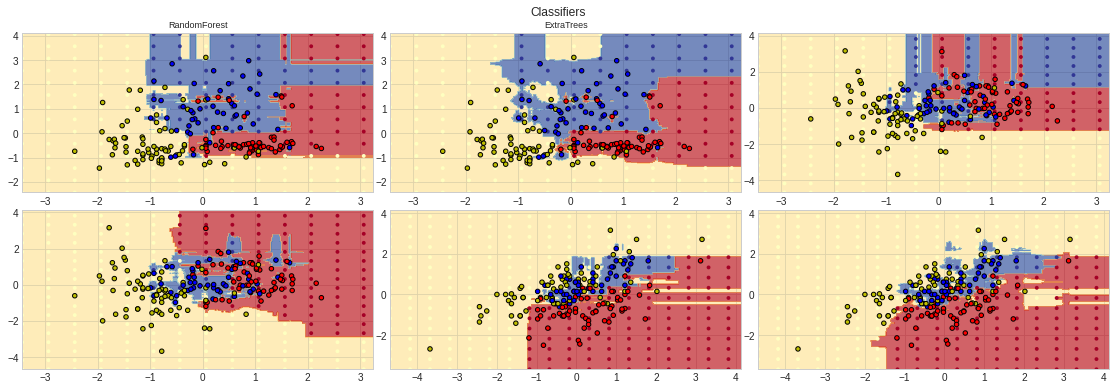

In [ ]:
plt.figure(figsize=(16,8))

for pair in ([0,1],[0,2],[2,3]):
  for model in models:
    X = wine.data[:, pair]
    y = wine.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X-mean)/std

    model.fit(X, y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy =  np.meshgrid(np.arange(x_min, x_max, plot_step),
                          np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    plt.scatter(X[:,0], X[:,1], c=y,
                cmap = ListedColormap(['r', 'y', 'b']),
                edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show();
plt.figure(figsize=(16,8))

for pair in ([0,1],[0,2],[2,3]):
  for model in models:
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X-mean)/std

    model.fit(X, y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy =  np.meshgrid(np.arange(x_min, x_max, plot_step),
                          np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    plt.scatter(X[:,0], X[:,1], c=y,
                cmap = ListedColormap(['r', 'y', 'b']),
                edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show();


## Random Forest, Extra Tree 분류 시각화(유방암)

In [ ]:
n_classes = 2
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = .02
plot_step_coarser = .5
RANDOM_SEED = 13

In [ ]:
cancer = load_breast_cancer()
plot_idx = 1
models = [RandomForestClassifier(n_estimators=n_estimators),
         ExtraTreesClassifier(n_estimators=n_estimators)]

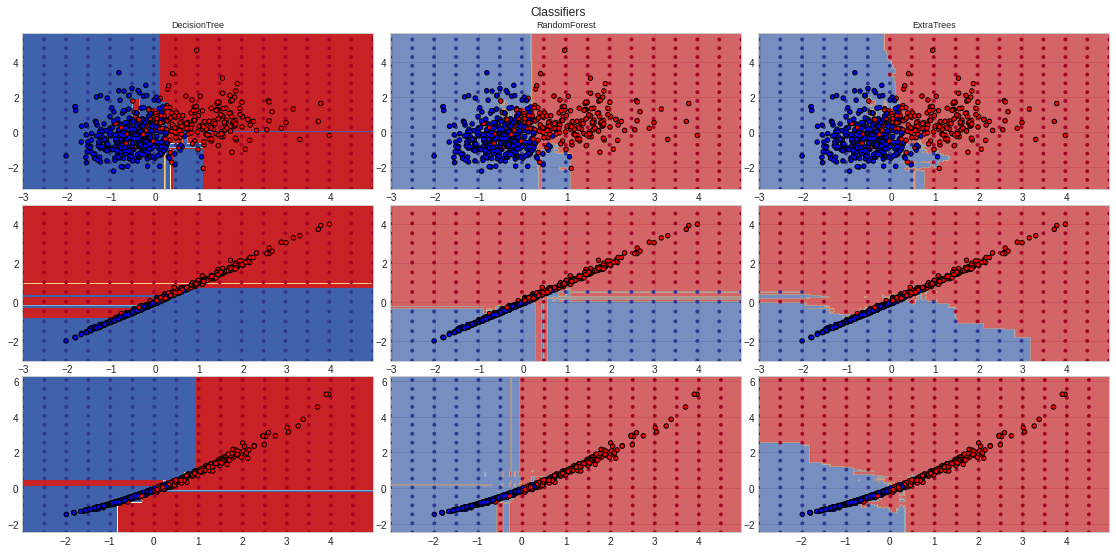

In [ ]:
plt.figure(figsize=(16,8))

for pair in ([0,1],[0,2],[2,3]):
  for model in models:
    X = cancer.data[:, pair]
    y = cancer.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X-mean)/std

    model.fit(X, y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy =  np.meshgrid(np.arange(x_min, x_max, plot_step),
                          np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    plt.scatter(X[:,0], X[:,1], c=y,
                cmap = ListedColormap(['r', 'y', 'b']),
                edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show();


## Random Forest 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.26607322692871094 (+/- 0.0067218812188774854)
avg score time: 0.008046817779541016 (+/- 0.0005844985471474732)
avg test score: 0.4170878086684036 (+/- 0.05203858503532412)


## Extra Tree 회귀

In [ ]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [ ]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1617405891418457 (+/- 0.006477752314739103)
avg score time: 0.008169078826904297 (+/- 9.866987966083635e-05)
avg test score: 0.44040340500685754 (+/- 0.03781021629382515)


## Random Forest, Extra Tree 회귀 시각화(당뇨병)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [14]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = .02
plot_step_coarser = .5
RANDOM_SEED = 13

In [17]:
plot_idx = 1
models = [RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

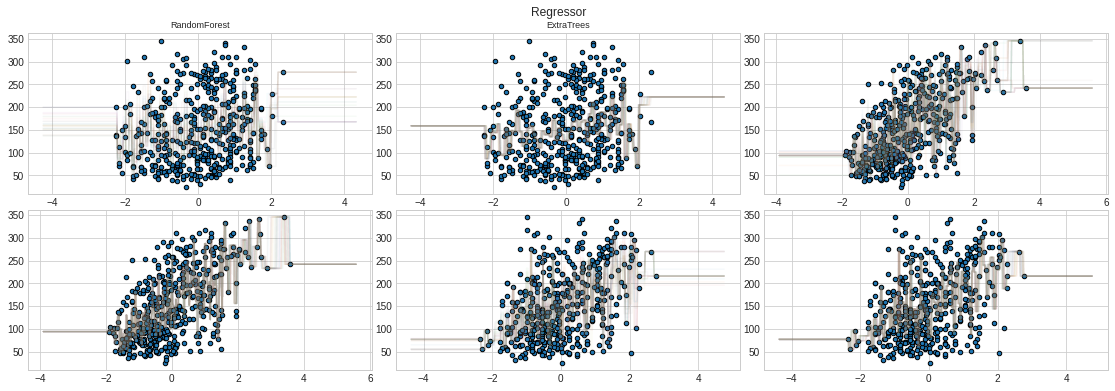

In [18]:
plt.figure(figsize=(16,8))

for pair in (0,2,3):
  for model in models:
    X = diabetes.data[:,pair]
    y = diabetes.target

    idx =  np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X.reshape(-1, 1), y)

    model_title = str(type(model)).split('.')[-1][:-2][:-len('Regressor')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1, 1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1, 1))
        cs = plt.plot(xx, Z, alpha=estimator_alpha)

    plt.scatter(X, y, edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle('Regressor', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show()

## VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor를 이용한 모델 학습 및 시각화

In [62]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

## 분류

### 와인

#### 투표

In [63]:
model1 = SVC()
model2 = GaussianNB()
model3 = ExtraTreesClassifier()
vote_model = VotingClassifier(
    estimators = [('svc',model1),('naive',model2),('extra',model3)],
    voting='hard'
)

In [66]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, wine.data, wine.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.66 (+/- 0.05) [SVC]
Accuracy: 0.97 (+/- 0.02) [GaussianNB]
Accuracy: 0.98 (+/- 0.02) [ExtraTreesClassifier]
Accuracy: 0.98 (+/- 0.02) [VotingClassifier]


In [68]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = ExtraTreesClassifier()
vote_model = VotingClassifier(
    estimators = [('svc',model1),('naive',model2),('extra',model3)],
    voting='soft',
    weights=[2,1,2]
)

In [69]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, wine.data, wine.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.66 (+/- 0.05) [SVC]
Accuracy: 0.97 (+/- 0.02) [GaussianNB]
Accuracy: 0.98 (+/- 0.01) [ExtraTreesClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [71]:
X = wine.data[:, [0,2]]
y = wine.target

In [72]:
model1 = GaussianNB()
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('gaussian',model1),('knn',model2),('svc',model3)], 
                              voting='soft', weights=[2,1,2])

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [73]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

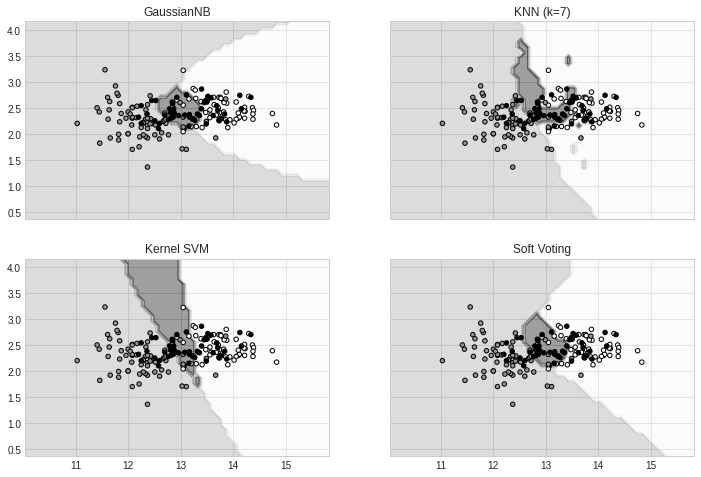

In [74]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                       [model1, model2, model3, vote_model],
                       ['GaussianNB', 'KNN (k=7)',
                        'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4,)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

#### 스택

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [55]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
               ('random forest',RandomForestClassifier()),
               ('naive', BernoulliNB())]

In [56]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator=ExtraTreesClassifier()
)

In [57]:
cross_val = cross_validate(
    estimator = clf,
    X = wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 4.148761367797851 (+/- 0.25991455505783045)
avg score time: 0.01478571891784668 (+/- 0.0001100245714052649)
avg test score: 0.9666666666666666 (+/- 0.03239417719358502)


#### 결정 경계 시각화

In [78]:
X = wine.data[:, [0,2]]
y = wine.target

In [79]:
model1 = LogisticRegression(max_iter=10000)
model2 = RandomForestClassifier()
model3 = BernoulliNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=ExtraTreesClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [80]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

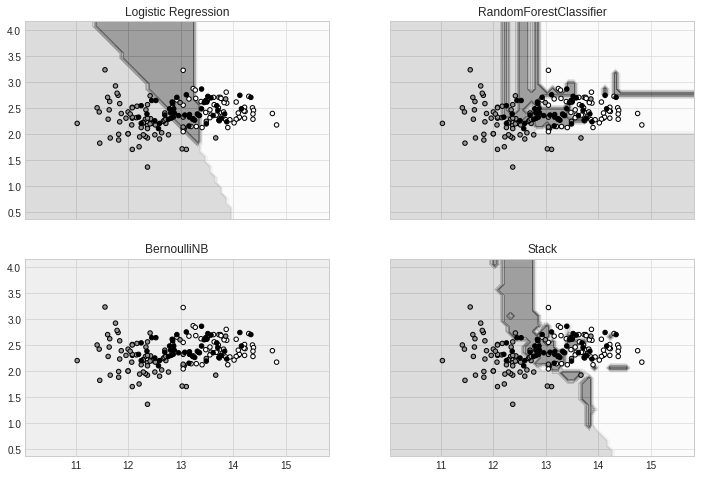

In [81]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                       [model1, model2, model3, stack],
                       ['Logistic Regression', 'RandomForestClassifier',
                        'BernoulliNB', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4,)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 유방암

#### 투표

In [84]:
model1 = ExtraTreesClassifier()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('extra',model1),('naive',model2),('forest',model3)],
    voting='hard'
)

In [88]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, cancer.data, cancer.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.96 (+/- 0.01) [ExtraTreesClassifier]
Accuracy: 0.94 (+/- 0.01) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


In [91]:
model1 = ExtraTreesClassifier()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('extra',model1),('naive',model2),('forest',model3)],
    voting='soft',
    weights=[2,1,2]
)

In [92]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, cancer.data, cancer.target, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.01) [ExtraTreesClassifier]
Accuracy: 0.94 (+/- 0.01) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.95 (+/- 0.01) [VotingClassifier]


In [93]:
X = cancer.data[:, [0,2]]
y = cancer.target

In [94]:
model1 = ExtraTreesClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('extra',model1),('knn',model2),('svc',model3)], 
                              voting='soft', weights=[2,1,2])

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [95]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

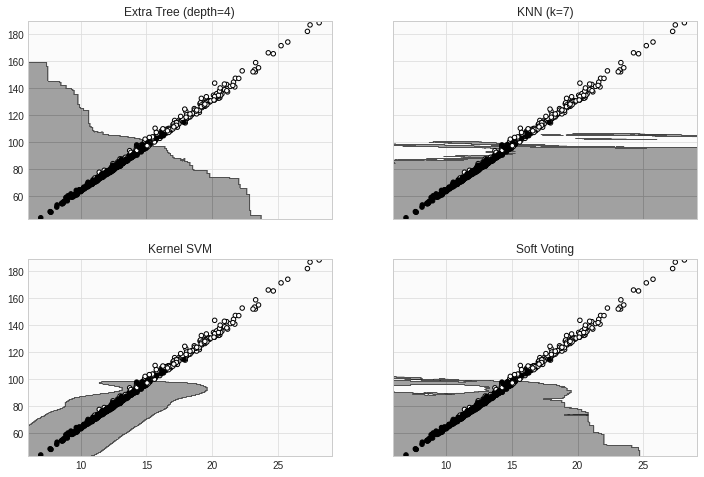

In [96]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                       [model1, model2, model3, vote_model],
                       ['Extra Tree (depth=4)', 'KNN (k=7)',
                        'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4,)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

#### 스택

In [97]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
               ('svc',SVC()),
               ('naive', BernoulliNB())]

In [98]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator=DecisionTreeClassifier()
)

In [99]:
cross_val = cross_validate(
    estimator = clf,
    X = cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 3.668550395965576 (+/- 0.2788288211310579)
avg score time: 0.002514505386352539 (+/- 2.38311743641619e-05)
avg test score: 0.9314547430523211 (+/- 0.008623595201515118)


#### 결정 경계 시각화

In [100]:
X = cancer.data[:, [0,2]]
y = cancer.target

In [101]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = BernoulliNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=DecisionTreeClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [102]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

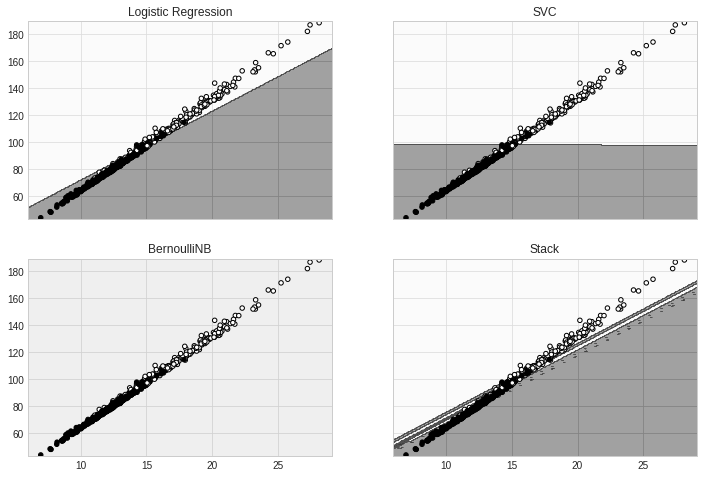

In [103]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                       [model1, model2, model3, stack],
                       ['Logistic Regression', 'SVC',
                        'BernoulliNB', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4,)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 회귀

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

### 당뇨병

#### 투표

In [ ]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = ExtraTreesRegressor()
vote_model = VotingRegressor(
    estimators = [('linear',model1),('gbr',model2),('extra',model3)],
    weights=[1,1,1]
)

In [ ]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5)
  print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.48 (+/- 0.05) [LinearRegression]
R2: 0.41 (+/- 0.07) [GradientBoostingRegressor]
R2: 0.44 (+/- 0.04) [ExtraTreesRegressor]
R2: 0.47 (+/- 0.05) [VotingRegressor]


In [139]:
X = diabetes.data[:,5].reshape(-1, 1)
y = diabetes.target

In [140]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = ExtraTreesRegressor()
vote_model = VotingRegressor(
    estimators = [('linear',model1),('gbr',model2),('extra',model3)],
    weights=[1,1,1]
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [141]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, .1)

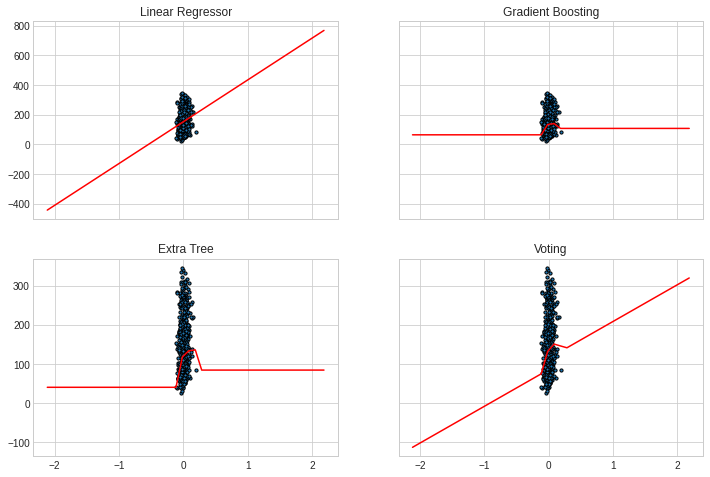

In [142]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regressor', 'Gradient Boosting', 'Extra Tree', 'Voting']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=10, edgecolors='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

#### 스택

In [146]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [147]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [148]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator=ExtraTreesRegressor()
    )
)

In [149]:
cross_val = cross_validate(
    estimator = reg,
    X = diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.19673590660095214 (+/- 0.015400079471077122)
avg score time: 0.009838056564331055 (+/- 0.0006654703640917006)
avg test score: 0.34566107650722405 (+/- 0.08648606115701704)


#### 회귀식 시각화

In [159]:
X = diabetes.data[:,0].reshape(-1, 1)
y = diabetes.target

In [160]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators = estimators,
        final_estimator=ExtraTreesRegressor()
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

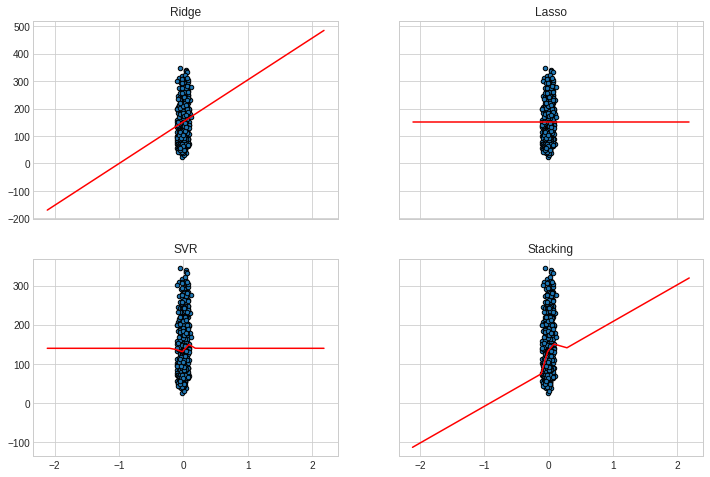

In [161]:
f, axarr = plt.subplots(2,2,sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'Stacking']):
  Z = model.predict(xx.reshape(-1, 1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolors='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()